#### Evaluating Census Tract/Block Group and Police Beat Overlap

_April 2022_

The purpose of this notebook is to explore the extent to which census geographical zones overlap with police beats (which comprise the most granular units of police geography we currently deal with), in order to assess the feasibility/validity of interpolating census statistics to police geographies.

In [2]:
import os
import sys
sys.path[0] = os.path.join(os.path.abspath(''),'../broadbandequity')  # import previously written functions to work with census data
from data_pipeline import fetch_census_data
from data_pipeline import spatial_operations

In [3]:
import geopandas as gpd
from shapely.errors import ShapelyDeprecationWarning
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 12]  # add more space to figures

In [4]:
# this code reads 5-year ACS data saved in a CSV in the data directory into a pandas dataframe
acs19_data = spatial_operations.geographize(fetch_census_data.acs5_aggregate()[["estimated total population","tract"]],"tract")
acs19_data

,tract,Shape_Leng,Shape_Area,SqMiles,GEOID2,geometry,estimated total population,area
0,840300,16035.054991,8.947394e+06,0.320945,59840300,"POLYGON ((-87.67528 41.83039, -87.67552 41.830...",3511,0.000090
1,840200,14719.012184,8.946045e+06,0.320896,60840200,"POLYGON ((-87.64160 41.84630, -87.64159 41.846...",2419,0.000090
2,841100,15186.400644,1.230614e+07,0.441424,34841100,"POLYGON ((-87.62935 41.85295, -87.62935 41.852...",7142,0.000124
3,841200,10472.230299,6.731931e+06,0.241476,31841200,"POLYGON ((-87.67849 41.85894, -87.67848 41.858...",4586,0.000068
4,838200,14719.443308,1.246016e+07,0.446949,28838200,"POLYGON ((-87.66652 41.87163, -87.66651 41.871...",2058,0.000126
...,...,...,...,...,...,...,...,...
802,630300,13232.831455,1.060785e+07,0.380506,63630300,"POLYGON ((-87.70377 41.80082, -87.70375 41.800...",5483,0.000107
803,630400,10648.157958,7.085428e+06,0.254156,63630400,"POLYGON ((-87.69380 41.79369, -87.69404 41.793...",6379,0.000071
804,630500,10637.040410,7.079999e+06,0.253961,63630500,"POLYGON ((-87.68422 41.80115, -87.68422 41.800...",5913,0.000071
805,630800,10625.328587,7.059211e+06,0.253215,63630800,"POLYGON ((-87.69360 41.78641, -87.69384 41.786...",6781,0.000071


<AxesSubplot:title={'center':'Census Tracts (2010s)'}>

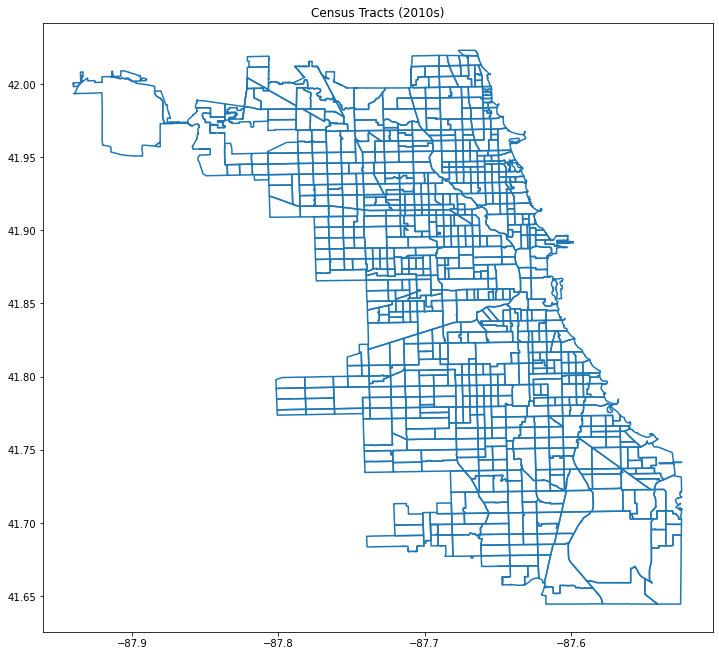

In [5]:
def simple_map(data,boundary=True,variable=None,title=None):
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
        # For some reason, below line prints deprecation warning for some but not all geometries
        # ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0.
        if variable is not None:
            fig = data.plot(column=variable,legend=True)
            if title is None:
                title = variable
        elif boundary:
            fig = data.boundary.plot()
        else:
            fig = data.plot()
        if title is not None:
            plt.title(title)
        return fig

simple_map(acs19_data,boundary=True,title='Census Tracts (2010s)')

In [6]:
police_beats = gpd.read_file('geo/police_beats.shp')
police_beats

,beat,beat_num,district,sector,geometry
0,1,1713,17,1,"POLYGON ((-87.70473 41.97577, -87.70472 41.975..."
1,0,3100,31,0,"POLYGON ((-87.83365 41.97535, -87.83366 41.974..."
2,5,1651,16,5,"POLYGON ((-87.90684 41.97656, -87.91070 41.975..."
3,1,1914,19,1,"POLYGON ((-87.64492 41.96973, -87.64431 41.969..."
4,1,1915,19,1,"POLYGON ((-87.63724 41.96599, -87.63644 41.965..."
...,...,...,...,...,...
272,1,0314,03,1,"POLYGON ((-87.58879 41.78612, -87.58844 41.786..."
273,2,0825,08,2,"POLYGON ((-87.67917 41.78656, -87.67912 41.784..."
274,1,0313,03,1,"POLYGON ((-87.60854 41.78583, -87.60808 41.785..."
275,2,0823,08,2,"POLYGON ((-87.69354 41.78458, -87.69354 41.784..."


<AxesSubplot:title={'center':'Current Police Beats'}>

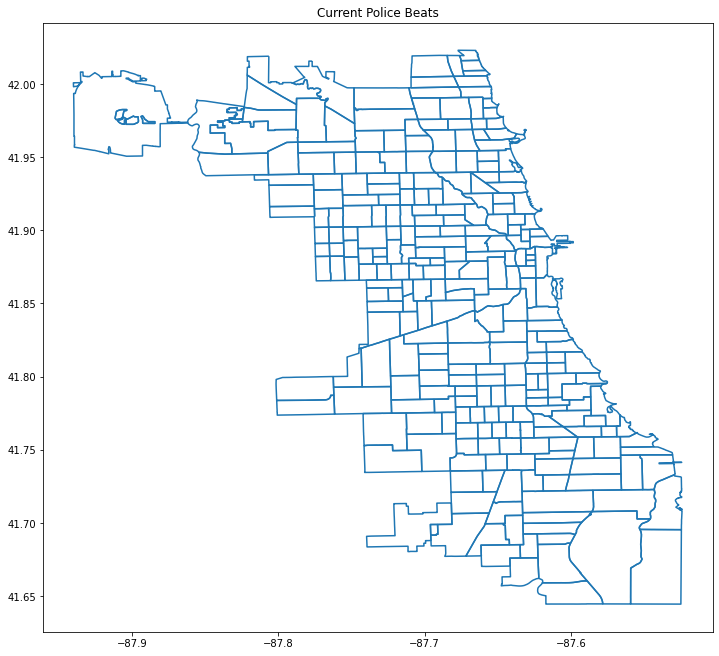

In [25]:
simple_map(police_beats,boundary=True,title='Current Police Beats')

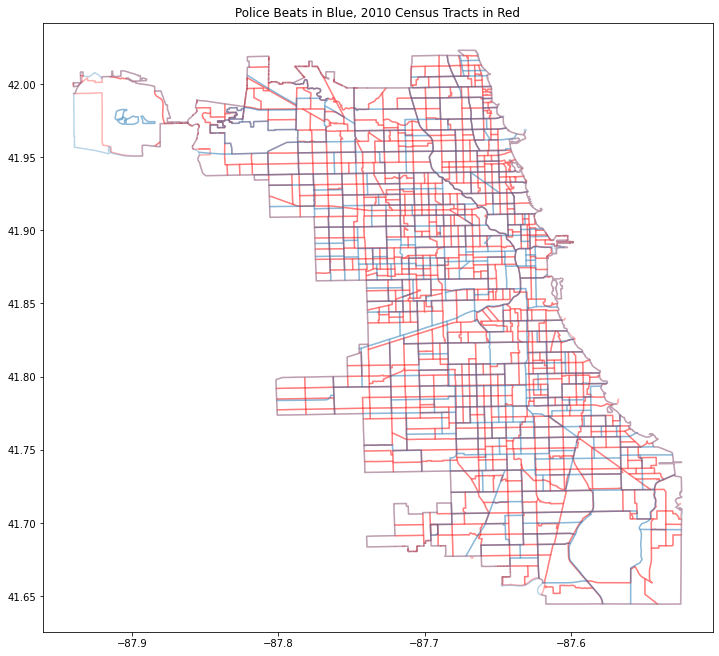

In [7]:
fig, ax = plt.subplots()
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    # For some reason, below line prints deprecation warning for some but not all geometries
    # ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0.
    acs19_data.boundary.plot(color="red",alpha=0.3,ax=ax)
    police_beats.boundary.plot(alpha=0.3,ax=ax)
plt.title('Police Beats in Blue, 2010 Census Tracts in Red')
plt.show()

Note that in the map above, blue lines are beat boundaries, red lines are tract boundaries, and purple lines are overlaps.

The more purple we see, the better; the more blue we see, the worse (as that indicates where beat boundaries divide tracts).

Overall, this is not a very reassuring picture.

I anecdotally validated a few of these overlaps by inspecting relevant areas imposed on a street map. For example, the long parallel boundaries at 41.83' N, 87.7' W is where beat boundaries run in the Chicago River while tract boundaries run along the adjacent Stevenson Expressway / I-55.

What's the best way to assess overlap? I've used the [Jaccard index](https://en.wikipedia.org/wiki/Jaccard_index) before: essentially intersection divided by union. But it also might be useful to look at "average percent of police beat [in # of tracts? area? interpolated population?] that is comprised of whole census tracts."

<AxesSubplot:title={'center':'Unique Tract-Beat Combinations'}>

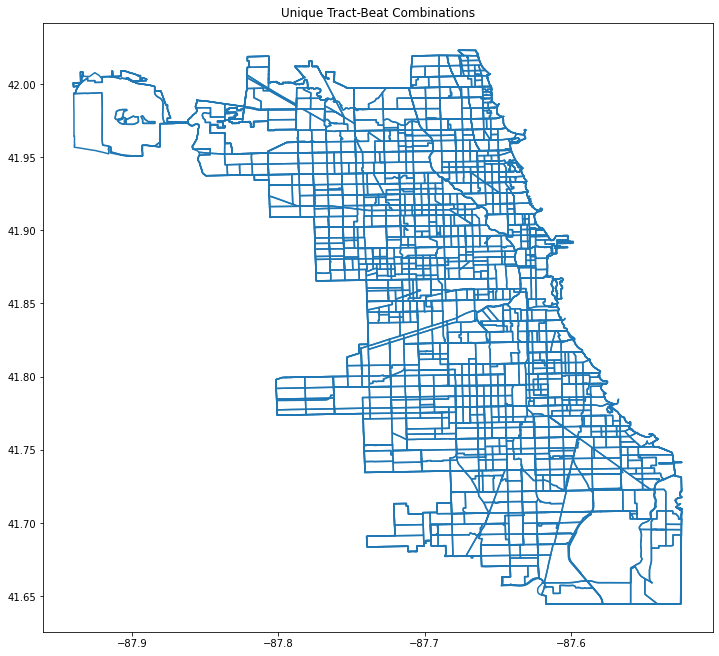

In [8]:
# We will use geopandas' spatial join function
# See https://geopandas.org/en/stable/docs/user_guide/set_operations.html
# We will first take the union of tracts and beats. Every resulting geometry is a unique combination of tract/beats that overlap
# (or the area of each tract/beat that doesn't overlap, if nonzero)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    overlap = gpd.overlay(police_beats,acs19_data,how='union')
overlap['area'] = overlap.apply(lambda row: row.geometry.area,axis=1)  # force-recalculate areas
simple_map(overlap,boundary=True,title="Unique Tract-Beat Combinations")

Text(0.5, 1.0, 'tracts per beat')

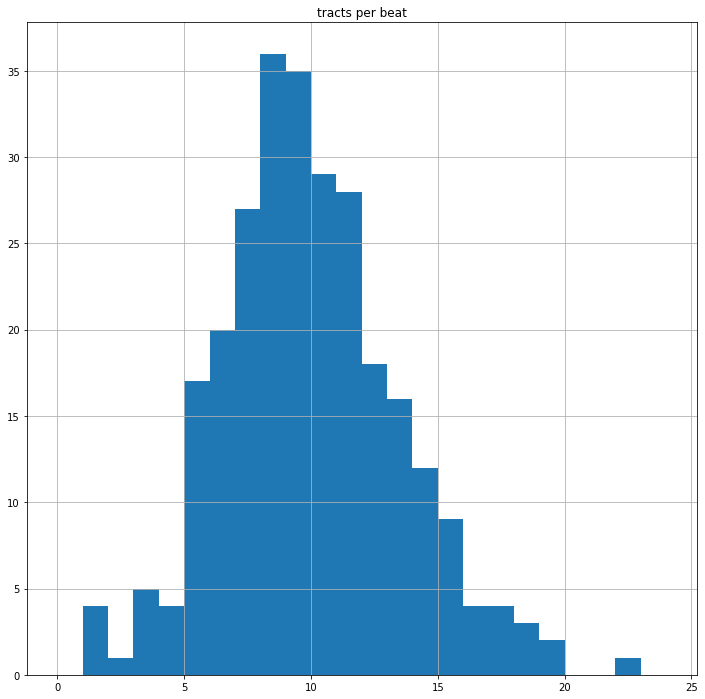

In [9]:
# calculate number of tracts overlapping with each beat
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    tracts_per_beat = overlap.groupby('beat_num').nunique()[["tract"]]
tracts_per_beat.hist(bins=range(0,25))
plt.title('tracts per beat')

In [10]:
# note that there are two beats that apparently didn't overlap with any tracts - which ones?
print([i for i in police_beats.beat_num if i not in list(tracts_per_beat.reset_index().beat_num)])

[]


In [11]:
# never mind! are there two duplicates in the police_beat data?
(len(police_beats.beat_num) == len(set(police_beats.beat_num)))

False

In [12]:
# guess so. let's find em. 
beats, counts = np.unique(police_beats.beat_num,return_counts=True)
max(counts)

3

In [13]:
# so there's actually one triplicate police beat!
police_beats[police_beats.beat_num == beats[np.argmax(counts)]]

,beat,beat_num,district,sector,geometry
1,0,3100,31,0,"POLYGON ((-87.83365 41.97535, -87.83366 41.974..."
55,0,3100,31,0,"POLYGON ((-87.82818 41.98384, -87.82816 41.983..."
263,0,3100,31,0,"POLYGON ((-87.69123 41.69899, -87.69123 41.698..."


We can see these three 3100 areas on the [beat map (031)](https://news.wttw.com/sites/default/files/Map%20of%20Chicago%20Police%20Districts%20and%20Beats.pdf). I think these may be non-Chicago municipalities that are enclaves of Chicago? Should check on this but will just proceed by removing them for now.

In [25]:
# remove triplicate
police_beats = police_beats[police_beats.beat_num != '3100']
len(police_beats)
# redo overlap
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    overlap = gpd.overlay(police_beats,acs19_data,how='intersection')
overlap['area'] = overlap.apply(lambda row: row.geometry.area,axis=1)  # force-recalculate areas

In [15]:
# now we will add two columns to overlap:
# the fraction of relevant beat in each intersected area
overlap["beat_frac"] = 0
# the fraction of relevant tract in each intersected area
overlap["tract_frac"] = 0

# fill in:
for row_index in range(len(overlap)):
    area = overlap.iloc[row_index]['area']  # fetches area
    beat_num = overlap.iat[row_index,1]  # fetches beat_num
    beat_area = police_beats[police_beats.beat_num==beat_num].area
    overlap.iat[row_index,12] = area/beat_area  # sets beat_frac
    tract_num = overlap.iat[row_index,4]  # fetches tract
    tract_area = acs19_data[acs19_data.tract==tract_num].area
    overlap.iat[row_index,13] = area/tract_area  # sets tract_frac

overlap.head()

,beat,beat_num,district,sector,tract,Shape_Leng,Shape_Area,SqMiles,GEOID2,estimated total population,area,geometry,beat_frac,tract_frac
0,1,1713,17,1,40800,6756.523369,2.476039e+06,0.088816,04040800,1691,9.092749e-10,"POLYGON ((-87.69714 41.96479, -87.69732 41.964...",0.000007,0.000036
1,1,1911,19,1,40800,6756.523369,2.476039e+06,0.088816,04040800,1691,2.473277e-05,"POLYGON ((-87.69475 41.96127, -87.69476 41.961...",0.099673,0.990024
2,2,1724,17,2,40800,6756.523369,2.476039e+06,0.088816,04040800,1691,2.483083e-07,"MULTIPOLYGON (((-87.69478 41.96137, -87.69476 ...",0.001264,0.009939
3,1,1713,17,1,40700,8705.811357,3.854384e+06,0.138258,04040700,3435,5.066028e-07,"POLYGON ((-87.70098 41.96843, -87.70091 41.968...",0.003978,0.013026
4,1,1911,19,1,40700,8705.811357,3.854384e+06,0.138258,04040700,3435,3.838322e-05,"POLYGON ((-87.69717 41.96481, -87.69720 41.964...",0.154685,0.986943


<AxesSubplot:title={'center':'Fraction of Tract in Beat, by Intersecting Area'}>

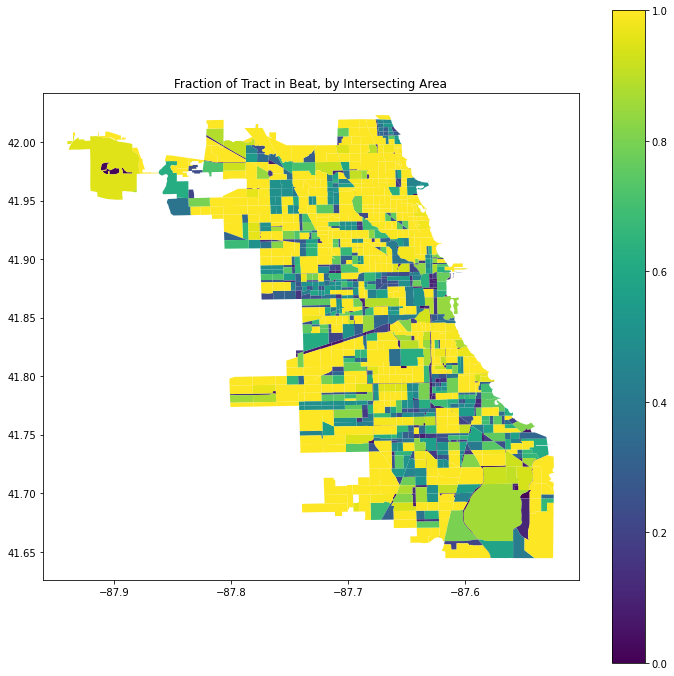

In [16]:
simple_map(overlap,variable='tract_frac',title='Fraction of Tract in Beat, by Intersecting Area')

In [27]:
# how many of these intersections are extremely marginal? 
print(f'# of intersections with less than 5% of both tract and beat: {len(overlap[(overlap.beat_frac<.05) & (overlap.tract_frac<.05)])}')

# of intersections with less than 5% of both tract and beat: 69


In [28]:
# let's remove those:
overlap = overlap[(overlap.beat_frac>.05) | (overlap.tract_frac>.05)]

In [30]:
# let's label the tracts that are "fully" within beats - defined as >95% of area in beat
overlap["tract_fully_in_beat"] = (overlap.tract_frac>.95)
print(f'number of tracts fully in a beat: {sum(overlap["tract_fully_in_beat"])} out of {len(acs19_data)}')

number of tracts fully in a beat: 497 out of 807


/var/folders/h2/1dptmntx7cqcbm48dz37csk00000gn/T/ipykernel_22488/1778230438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overlap["tract_fully_in_beat"] = (overlap.tract_frac>.95)


In [31]:
overlap_groupedby_beat = overlap.groupby('beat_num')
beat_composition = overlap_groupedby_beat.nunique()[["tract"]]
beat_composition["fully contained tracts"] = overlap_groupedby_beat.sum()[["tract_fully_in_beat"]]
beat_composition = beat_composition.rename(columns={"tract":"overlapping tracts"})
beat_composition["partial tracts"] = beat_composition["overlapping tracts"]-beat_composition["fully contained tracts"]
beat_composition["tract frac fully contained"] = beat_composition["fully contained tracts"]/beat_composition["overlapping tracts"]
beat_composition

/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/array.py:117: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,overlapping tracts,fully contained tracts,partial tracts,tract frac fully contained
beat_num,,,,
0111,2,0,2,0.000
0112,3,0,3,0.000
0113,2,0,2,0.000
0114,4,0,4,0.000
0121,3,0,3,0.000
...,...,...,...,...
2531,2,1,1,0.500
2532,2,1,1,0.500
2533,8,3,5,0.375


Text(0.5, 1.0, 'fraction of tracts overlapping beat that are fully contained')

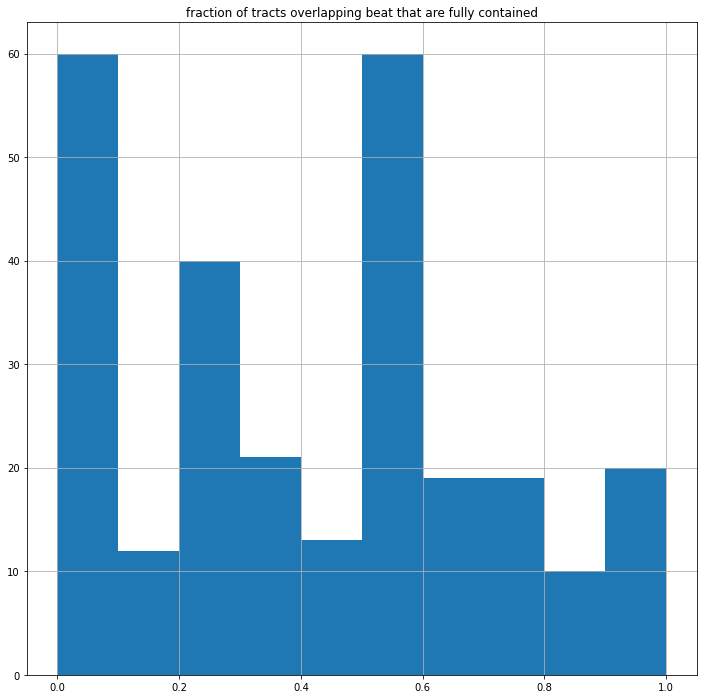

In [32]:
beat_composition["tract frac fully contained"].hist()
plt.title("fraction of tracts overlapping beat that are fully contained")

<AxesSubplot:>

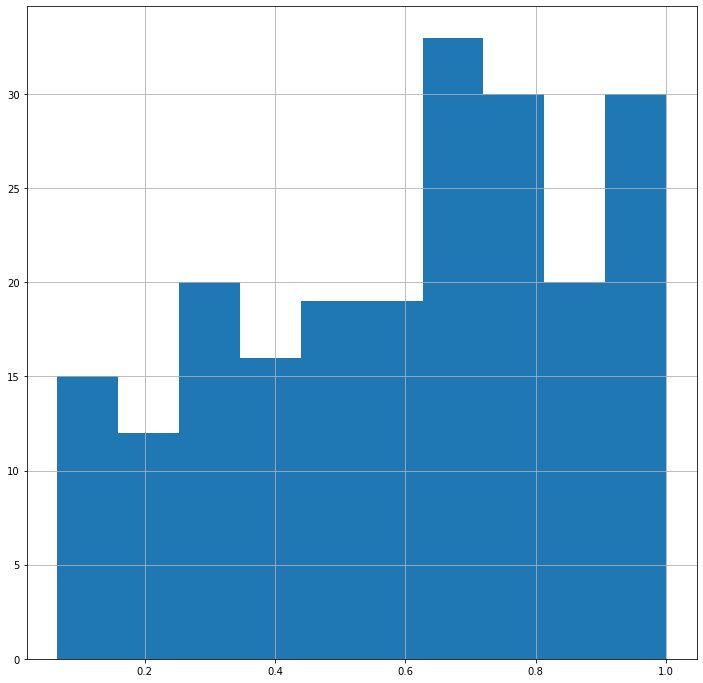

In [33]:
whole_tracts_groupedby_beat = overlap[overlap.tract_fully_in_beat==1].groupby('beat_num')
beat_composition["frac area in full tracts"] = whole_tracts_groupedby_beat.sum()[["beat_frac"]]
beat_composition["frac area in full tracts"].hist()

In [37]:
# merge back to beat geometries
police_beats = pd.merge(police_beats,beat_composition,on="beat_num")
police_beats

,beat,beat_num,district,sector,geometry,overlapping tracts,fully contained tracts,partial tracts,tract frac fully contained,frac area in full tracts
0,1,1713,17,1,"POLYGON ((-87.70473 41.97577, -87.70472 41.975...",6,1,5,0.166667,0.245604
1,5,1651,16,5,"POLYGON ((-87.90684 41.97656, -87.91070 41.975...",1,0,1,0.000000,NaN
2,1,1914,19,1,"POLYGON ((-87.64492 41.96973, -87.64431 41.969...",4,2,2,0.500000,0.272406
3,1,1915,19,1,"POLYGON ((-87.63724 41.96599, -87.63644 41.965...",3,1,2,0.333333,0.244013
4,1,1913,19,1,"POLYGON ((-87.65967 41.96903, -87.65967 41.968...",2,1,1,0.500000,0.766210
...,...,...,...,...,...,...,...,...,...,...
269,1,0314,03,1,"POLYGON ((-87.58879 41.78612, -87.58844 41.786...",6,0,6,0.000000,NaN
270,2,0825,08,2,"POLYGON ((-87.67917 41.78656, -87.67912 41.784...",3,0,3,0.000000,NaN
271,1,0313,03,1,"POLYGON ((-87.60854 41.78583, -87.60808 41.785...",3,2,1,0.666667,0.749331
272,2,0823,08,2,"POLYGON ((-87.69354 41.78458, -87.69354 41.784...",7,1,6,0.142857,0.066291


Note that this output is 3 rows shorter than `police_beats` because we removed the triplicate 3100 beat.

In [38]:
# note the NaNs in the "frac area in full tracts" column:
# those are beats where none of the tracts were full and should be corrected to 0
police_beats['frac area in full tracts'] = police_beats['frac area in full tracts'].fillna(0)

<AxesSubplot:title={'center':'fraction of constituent tracts fully in beat'}>

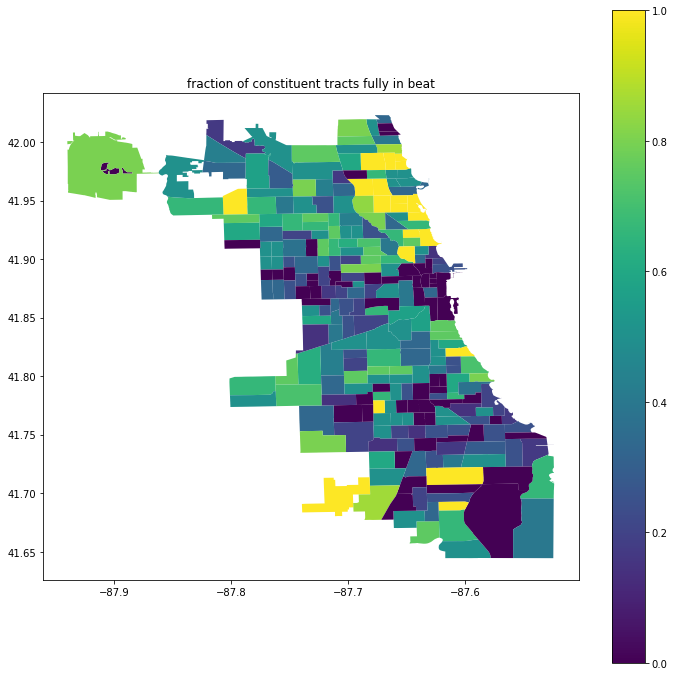

In [39]:
simple_map(police_beats,variable="tract frac fully contained",title="fraction of constituent tracts fully in beat")

<AxesSubplot:title={'center':'fraction of beat area in full tracts'}>

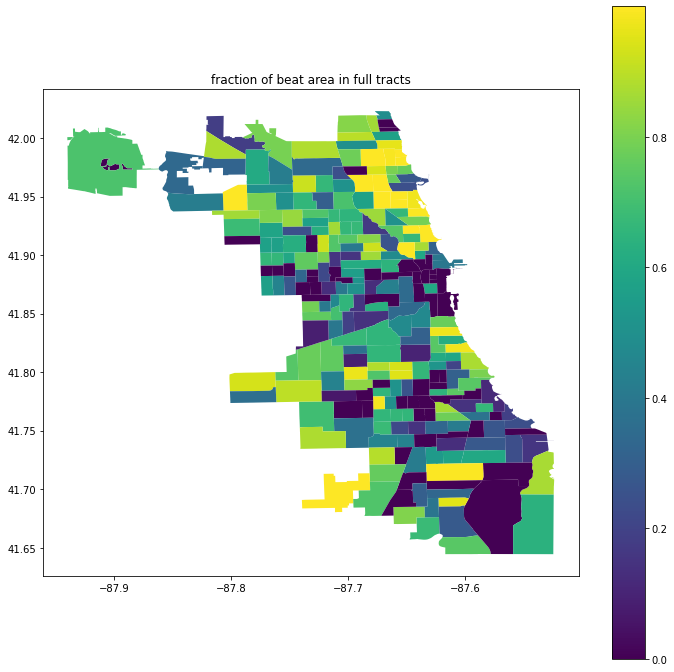

In [40]:
simple_map(police_beats,variable="frac area in full tracts",title="fraction of beat area in full tracts")

## Block Groups

In [7]:
blocks = gpd.read_file("geo/chicago_blocks.shp")
blocks

,blockce10,countyfp10,geoid10,name10,statefp10,tract_bloc,tractce10,geometry
0,2010,031,170316903002010,Block 2010,17,6903002010,690300,"POLYGON ((-87.62907 41.76909, -87.62905 41.768..."
1,3007,031,170316809003007,Block 3007,17,6809003007,680900,"POLYGON ((-87.63412 41.77447, -87.63410 41.774..."
2,3013,031,170316809003013,Block 3013,17,6809003013,680900,"POLYGON ((-87.63485 41.77263, -87.63522 41.772..."
3,4019,031,170312909004019,Block 4019,17,2909004019,290900,"POLYGON ((-87.73841 41.85913, -87.73842 41.859..."
4,4016,031,170312925004016,Block 4016,17,2925004016,292500,"POLYGON ((-87.73217 41.85476, -87.73226 41.854..."
...,...,...,...,...,...,...,...,...
46352,1028,031,170312203001028,Block 1028,17,2203001028,220300,"POLYGON ((-87.69323 41.92767, -87.69385 41.927..."
46353,1030,031,170312203001030,Block 1030,17,2203001030,220300,"POLYGON ((-87.69320 41.92667, -87.69351 41.926..."
46354,2014,031,170318310002014,Block 2014,17,8310002014,831000,"POLYGON ((-87.67759 41.91624, -87.67759 41.916..."
46355,2001,031,170318310002001,Block 2001,17,8310002001,831000,"POLYGON ((-87.67398 41.91783, -87.67397 41.917..."


As per [census guidance](https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html), "the first digit of a census block code represents the block group code." We will therefore use all but the last three digits of `geoid10` to uniquely identify each block group. We'll proceed to dissolve blocks to obtain block group geometries.

In [8]:
blocks["block_group"] = blocks.geoid10.str[:-3]
blocks

,blockce10,countyfp10,geoid10,name10,statefp10,tract_bloc,tractce10,geometry,block_group
0,2010,031,170316903002010,Block 2010,17,6903002010,690300,"POLYGON ((-87.62907 41.76909, -87.62905 41.768...",170316903002
1,3007,031,170316809003007,Block 3007,17,6809003007,680900,"POLYGON ((-87.63412 41.77447, -87.63410 41.774...",170316809003
2,3013,031,170316809003013,Block 3013,17,6809003013,680900,"POLYGON ((-87.63485 41.77263, -87.63522 41.772...",170316809003
3,4019,031,170312909004019,Block 4019,17,2909004019,290900,"POLYGON ((-87.73841 41.85913, -87.73842 41.859...",170312909004
4,4016,031,170312925004016,Block 4016,17,2925004016,292500,"POLYGON ((-87.73217 41.85476, -87.73226 41.854...",170312925004
...,...,...,...,...,...,...,...,...,...
46352,1028,031,170312203001028,Block 1028,17,2203001028,220300,"POLYGON ((-87.69323 41.92767, -87.69385 41.927...",170312203001
46353,1030,031,170312203001030,Block 1030,17,2203001030,220300,"POLYGON ((-87.69320 41.92667, -87.69351 41.926...",170312203001
46354,2014,031,170318310002014,Block 2014,17,8310002014,831000,"POLYGON ((-87.67759 41.91624, -87.67759 41.916...",170318310002
46355,2001,031,170318310002001,Block 2001,17,8310002001,831000,"POLYGON ((-87.67398 41.91783, -87.67397 41.917...",170318310002


/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


<AxesSubplot:title={'center':'Block Groups (2010s)'}>

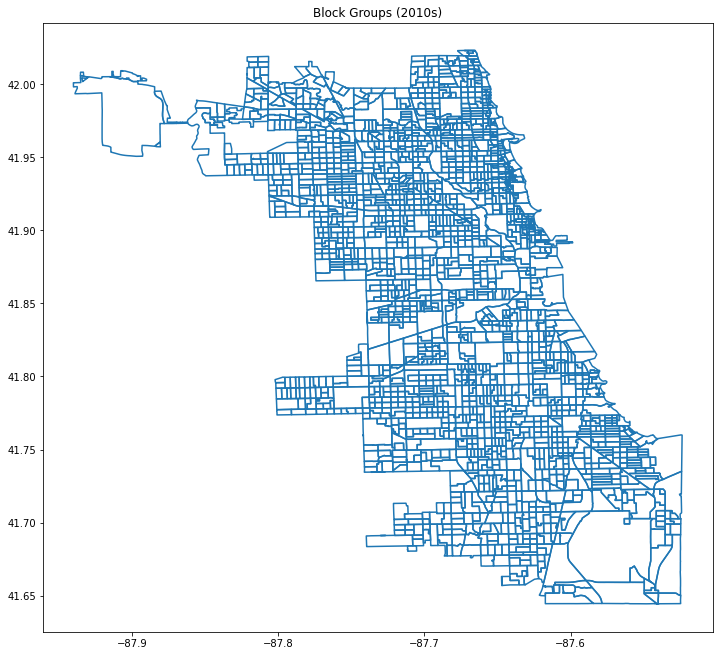

In [19]:
block_groups = blocks.dissolve(by="block_group").reset_index()
simple_map(block_groups,boundary=True,title='Block Groups (2010s)')

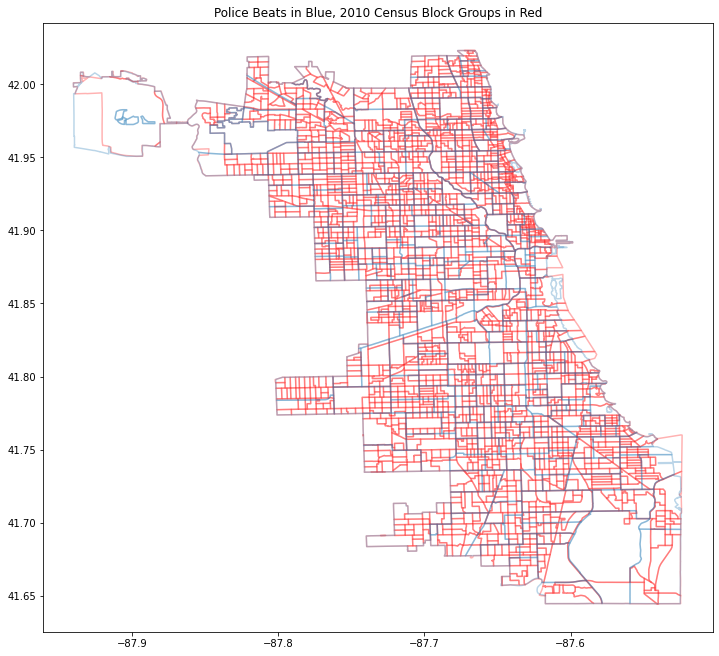

In [21]:
fig, ax = plt.subplots()
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    # For some reason, below line prints deprecation warning for some but not all geometries
    # ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0.
    block_groups.boundary.plot(color="red",alpha=0.3,ax=ax)
    police_beats.boundary.plot(alpha=0.3,ax=ax)
plt.title('Police Beats in Blue, 2010 Census Block Groups in Red')
plt.show()

Note that in the map above, blue lines are beat boundaries, red lines are block group boundaries, and purple lines are overlaps.

The more purple we see, the better; the more blue we see, the worse (as that indicates where beat boundaries divide block groups).

There's some blue, but not too much. And a few of the prominent areas of blue shouldn't create problems (eg along the river instead of highway, differences in coastline).

From this point forward, we will replicate the tract analysis with block groups.

<AxesSubplot:title={'center':'Unique Block Group-Beat Combinations'}>

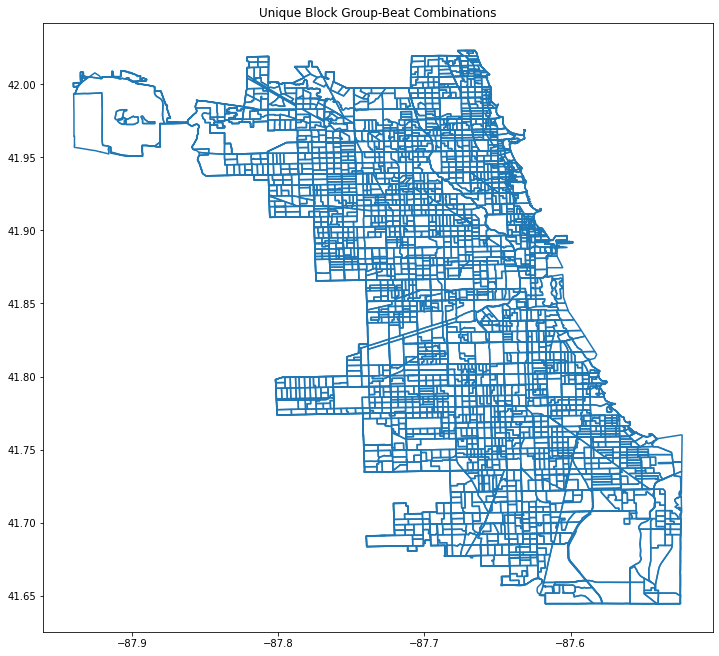

In [26]:
# We will use geopandas' spatial join function
# See https://geopandas.org/en/stable/docs/user_guide/set_operations.html
# We will first take the union of block groups and beats. Every resulting geometry is a unique combination of block group/beats that overlap
# (or the area of each block group/beat that doesn't overlap, if nonzero)

# Note that we removed the triplicate beat in police_beats already (see above)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    bg_overlap = gpd.overlay(police_beats,block_groups,how='union')
bg_overlap['area'] = bg_overlap.apply(lambda row: row.geometry.area,axis=1)  # force-recalculate areas
simple_map(bg_overlap,boundary=True,title="Unique Block Group-Beat Combinations")

Text(0.5, 1.0, 'block groups per beat')

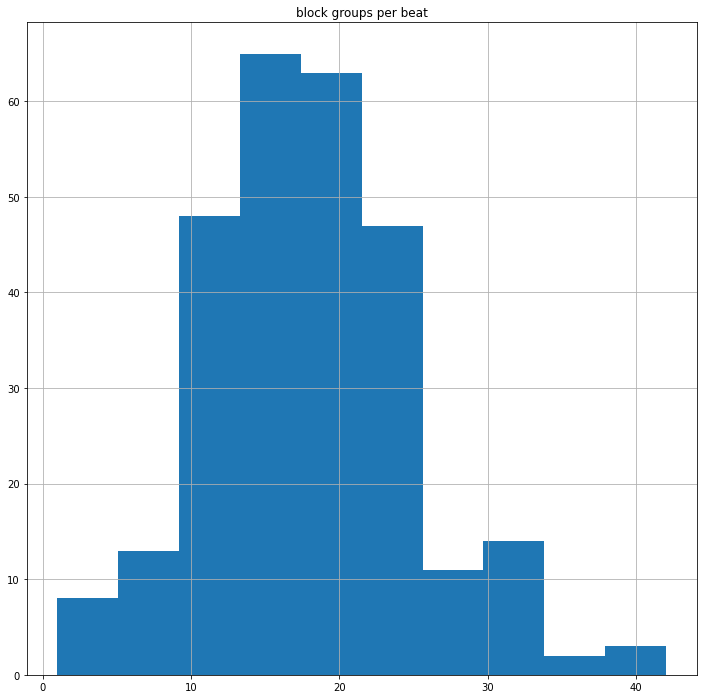

In [27]:
# calculate number of block groups overlapping with each beat
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    bgs_per_beat = bg_overlap.groupby('beat_num').nunique()[["block_group"]]
bgs_per_beat.hist()
plt.title('block groups per beat')

<AxesSubplot:>

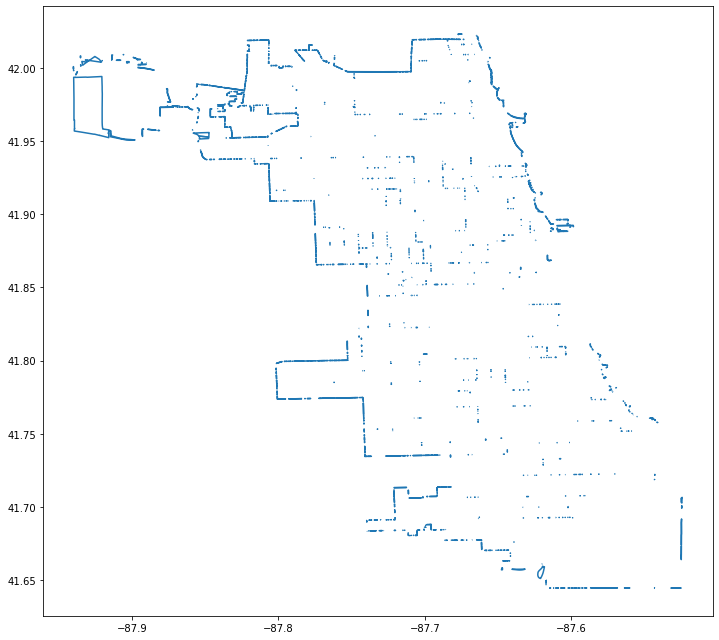

In [38]:
# drop geometries that aren't in a beat - those don't matter for our purposes
bg_overlap = bg_overlap.dropna(subset=["beat_num"])

# check which geometries are in a beat but not a block group
simple_map(bg_overlap[bg_overlap.block_group.isnull()],boundary=True)

In [39]:
# on inspection, this is just due to extremely marginal boundary mismatches (like, street-sized) - so we can drop those as well
bg_overlap = bg_overlap.dropna(subset=["block_group"])

In [41]:
# now we will add two columns to bg_overlap:
# the fraction of relevant beat in each intersected area
bg_overlap["beat_frac"] = 0
# the fraction of relevant block group in each intersected area
bg_overlap["bg_frac"] = 0

# fill in:
for row_index in range(len(bg_overlap)):
    area = bg_overlap.iloc[row_index]['area']  # fetches area
    beat_num = bg_overlap.iat[row_index,1]  # fetches beat_num
    beat_area = police_beats[police_beats.beat_num==beat_num].area
    bg_overlap.iat[row_index,14] = area/beat_area  # sets beat_frac
    bg_num = bg_overlap.iat[row_index,4]  # fetches block group
    bg_area = block_groups[block_groups.block_group==bg_num].area
    bg_overlap.iat[row_index,15] = area/bg_area  # sets bg_frac

bg_overlap.head()

,beat,beat_num,district,sector,block_group,blockce10,countyfp10,geoid10,name10,statefp10,tract_bloc,tractce10,geometry,area,beat_frac,bg_frac
0,1,1713,17,1,170311408002,2015,031,170311408002015,Block 2015,17,1408002015,140800,"MULTIPOLYGON (((-87.69757 41.96478, -87.69797 ...",5.008792e-10,0.000004,0.000036
1,1,1911,19,1,170311408002,2015,031,170311408002015,Block 2015,17,1408002015,140800,"MULTIPOLYGON (((-87.69485 41.96148, -87.69489 ...",9.270304e-09,0.000037,0.000664
2,2,1724,17,2,170311408002,2015,031,170311408002015,Block 2015,17,1408002015,140800,"POLYGON ((-87.69522 41.96230, -87.69518 41.962...",1.394507e-05,0.071013,0.999300
3,1,1713,17,1,170310408002,2008,031,170310408002008,Block 2008,17,0408002008,040800,"POLYGON ((-87.69714 41.96479, -87.69732 41.964...",9.092678e-10,0.000007,0.000076
4,1,1911,19,1,170310408002,2008,031,170310408002008,Block 2008,17,0408002008,040800,"POLYGON ((-87.69475 41.96127, -87.69476 41.961...",1.172858e-05,0.047266,0.979193


<AxesSubplot:title={'center':'Fraction of Block Group in Beat, by Intersecting Area'}>

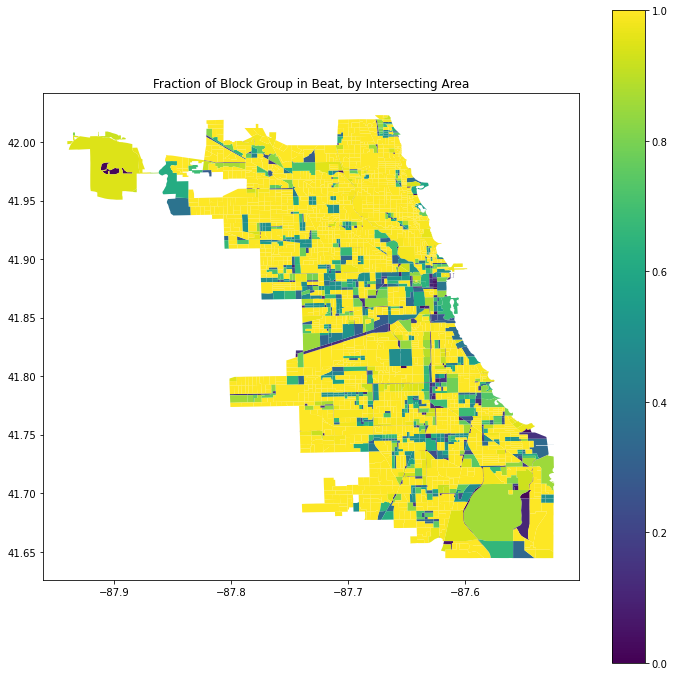

In [42]:
simple_map(bg_overlap,variable='bg_frac',title='Fraction of Block Group in Beat, by Intersecting Area')

In [43]:
# how many of these intersections are extremely marginal? 
print(f'# of intersections with less than 5% of both block group and beat: {len(bg_overlap[(bg_overlap.beat_frac<.05) & (bg_overlap.bg_frac<.05)])}')

# of intersections with less than 5% of both block group and beat: 2243


In [44]:
# let's remove those:
bg_overlap = bg_overlap[(bg_overlap.beat_frac>.05) | (bg_overlap.bg_frac>.05)]

In [49]:
# let's label the block groups that are "fully" within beats - defined as >95% of area in beat
bg_overlap["bg_fully_in_beat"] = (bg_overlap.bg_frac>.95)
print(f'number of block groups fully in a beat: {sum(bg_overlap["bg_fully_in_beat"])} out of {len(block_groups)}')
print('note that this could be an underestimate because we may be including block groups fully outside of beats')

number of block groups fully in a beat: 1734 out of 2194
note that this could be an underestimate because we may be including block groups fully outside of beats


In [52]:
bg_overlap_groupedby_beat = bg_overlap.groupby('beat_num')
bg_beat_composition = bg_overlap_groupedby_beat.nunique()[["block_group"]]
bg_beat_composition["fully contained bgs"] = bg_overlap_groupedby_beat.sum()[["bg_fully_in_beat"]]
bg_beat_composition = bg_beat_composition.rename(columns={"block_group":"overlapping bgs"})
bg_beat_composition["partial bgs"] = bg_beat_composition["overlapping bgs"]-bg_beat_composition["fully contained bgs"]
bg_beat_composition["bg frac fully contained"] = bg_beat_composition["fully contained bgs"]/bg_beat_composition["overlapping bgs"]
bg_beat_composition

/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/array.py:117: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,overlapping bgs,fully contained bgs,partial bgs,bg frac fully contained
beat_num,,,,
0111,3,0,3,0.000000
0112,3,0,3,0.000000
0113,3,0,3,0.000000
0114,7,2,5,0.285714
0121,5,1,4,0.200000
...,...,...,...,...
2531,7,6,1,0.857143
2532,9,8,1,0.888889
2533,12,5,7,0.416667


Text(0.5, 1.0, 'fraction of block groups overlapping beat that are fully contained')

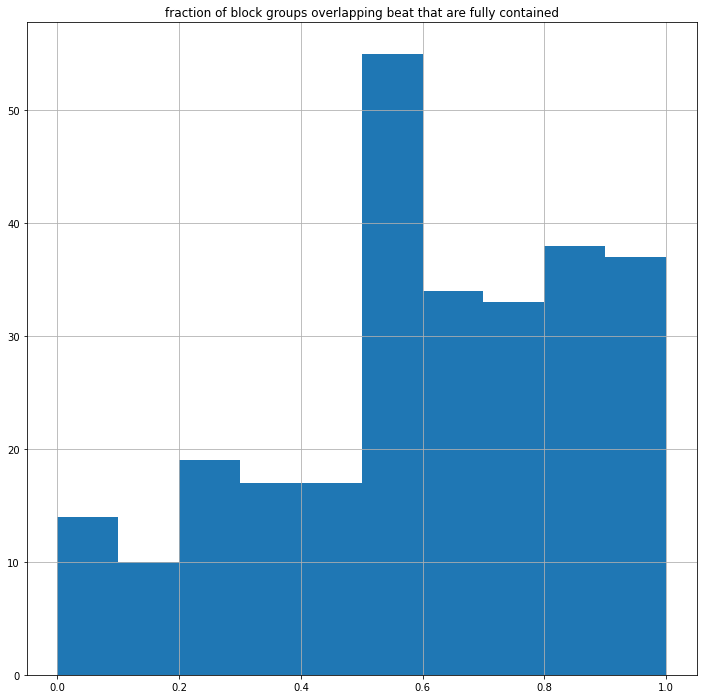

In [53]:
bg_beat_composition["bg frac fully contained"].hist()
plt.title("fraction of block groups overlapping beat that are fully contained")

<AxesSubplot:>

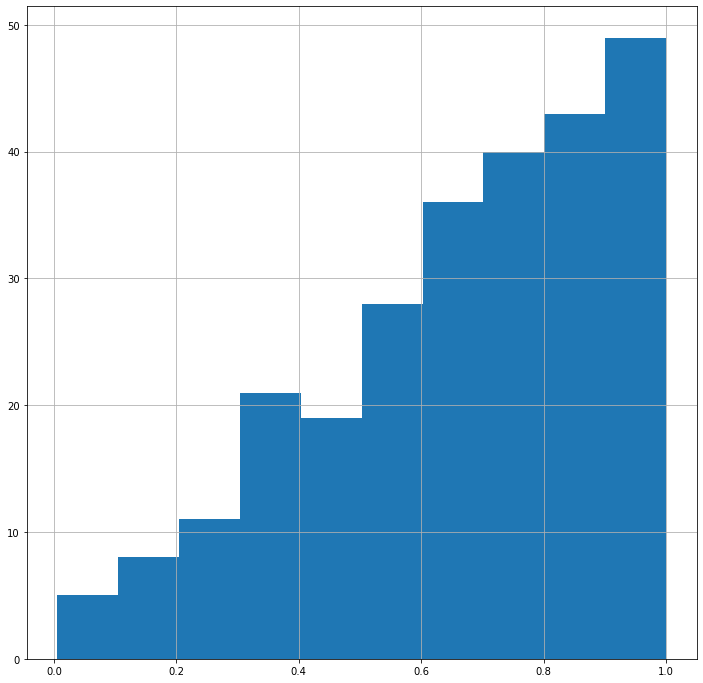

In [54]:
whole_bgs_groupedby_beat = bg_overlap[bg_overlap.bg_fully_in_beat==1].groupby('beat_num')
bg_beat_composition["frac area in full bgs"] = whole_bgs_groupedby_beat.sum()[["beat_frac"]]
bg_beat_composition["frac area in full bgs"].hist()

In [55]:
# merge back to beat geometries
police_beats = pd.merge(police_beats,bg_beat_composition,on="beat_num")
police_beats

,beat,beat_num,district,sector,geometry,overlapping bgs,fully contained bgs,partial bgs,bg frac fully contained,frac area in full bgs
0,1,1713,17,1,"POLYGON ((-87.70473 41.97577, -87.70472 41.975...",12,6,6,0.500000,0.763833
1,5,1651,16,5,"POLYGON ((-87.90684 41.97656, -87.91070 41.975...",1,0,1,0.000000,NaN
2,1,1914,19,1,"POLYGON ((-87.64492 41.96973, -87.64431 41.969...",11,6,5,0.545455,0.272406
3,1,1915,19,1,"POLYGON ((-87.63724 41.96599, -87.63644 41.965...",12,10,2,0.833333,0.697861
4,1,1913,19,1,"POLYGON ((-87.65967 41.96903, -87.65967 41.968...",7,4,3,0.571429,0.766210
...,...,...,...,...,...,...,...,...,...,...
269,1,0314,03,1,"POLYGON ((-87.58879 41.78612, -87.58844 41.786...",7,1,6,0.142857,0.126680
270,2,0825,08,2,"POLYGON ((-87.67917 41.78656, -87.67912 41.784...",9,4,5,0.444444,0.381441
271,1,0313,03,1,"POLYGON ((-87.60854 41.78583, -87.60808 41.785...",5,4,1,0.800000,0.749331
272,2,0823,08,2,"POLYGON ((-87.69354 41.78458, -87.69354 41.784...",20,10,10,0.500000,0.632850


In [56]:
# note the NaNs in the "frac area in full bgs" column:
# those are beats where none of the bgs were full and should be corrected to 0
police_beats['frac area in full bgs'] = police_beats['frac area in full bgs'].fillna(0)

<AxesSubplot:title={'center':'fraction of constituent block groups fully in beat'}>

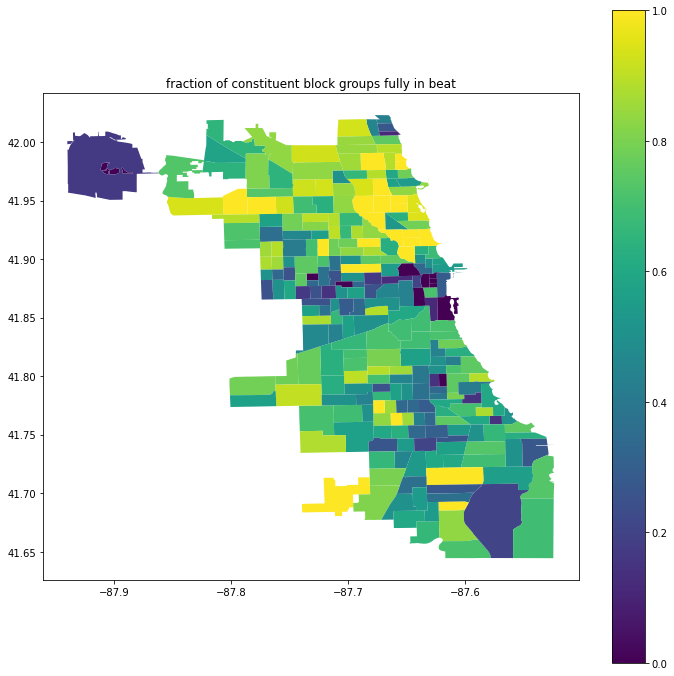

In [57]:
simple_map(police_beats,variable="bg frac fully contained",title="fraction of constituent block groups fully in beat")

<AxesSubplot:title={'center':'fraction of beat area in full block groups'}>

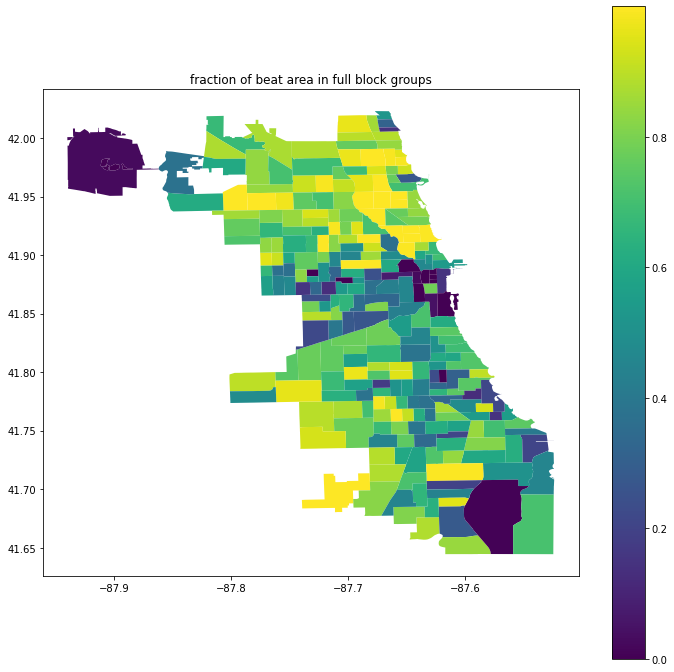

In [58]:
simple_map(police_beats,variable="frac area in full bgs",title="fraction of beat area in full block groups")